In [58]:
import pandas as pd

import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [59]:
data = pd.read_csv('city_temperatures.csv')


In [60]:
data

Source        Date    Mean  AvgTemperature
0        GCAG   12/6/2016  0.7895            64.2
1     GISTEMP   12/6/2016  0.8100            49.4
2        GCAG   11/6/2016  0.7504            48.8
3     GISTEMP   11/6/2016  0.9300            46.4
4        GCAG   10/6/2016  0.7292            47.9
...       ...         ...     ...             ...
3283  GISTEMP  1880-03-06 -0.1800            49.6
3284     GCAG  1880-02-06 -0.1229            51.6
3285  GISTEMP  1880-02-06 -0.2100            55.3
3286     GCAG  1880-01-06  0.0009            56.8
3287  GISTEMP  1880-01-06 -0.3000            50.8

[3288 rows x 4 columns]

In [61]:
x = data.iloc[:,[2,3]]

In [62]:
x

Mean  AvgTemperature
0     0.7895            64.2
1     0.8100            49.4
2     0.7504            48.8
3     0.9300            46.4
4     0.7292            47.9
...      ...             ...
3283 -0.1800            49.6
3284 -0.1229            51.6
3285 -0.2100            55.3
3286  0.0009            56.8
3287 -0.3000            50.8

[3288 rows x 2 columns]

In [63]:
kmeans = KMeans(3)


In [64]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [65]:
identified_clusters = kmeans.fit_predict(x)


In [66]:
identified_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters


Source        Date    Mean  AvgTemperature  Cluster
0        GCAG   12/6/2016  0.7895            64.2        1
1     GISTEMP   12/6/2016  0.8100            49.4        1
2        GCAG   11/6/2016  0.7504            48.8        1
3     GISTEMP   11/6/2016  0.9300            46.4        1
4        GCAG   10/6/2016  0.7292            47.9        1
...       ...         ...     ...             ...      ...
3283  GISTEMP  1880-03-06 -0.1800            49.6        1
3284     GCAG  1880-02-06 -0.1229            51.6        1
3285  GISTEMP  1880-02-06 -0.2100            55.3        1
3286     GCAG  1880-01-06  0.0009            56.8        1
3287  GISTEMP  1880-01-06 -0.3000            50.8        1

[3288 rows x 5 columns]

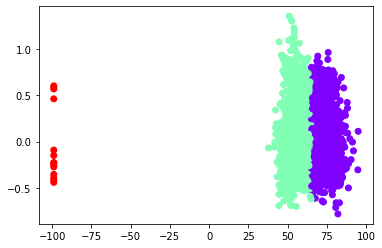

In [68]:
plt.scatter(data_with_clusters['AvgTemperature'],data_with_clusters['Mean'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()

In [70]:
scaler = MinMaxScaler()
scaler.fit(data[['AvgTemperature']])
data['AvgTemperature'] = scaler.transform(data[['AvgTemperature']])


scaler.fit(data[['Mean']])
data['Mean'] = scaler.transform(data[['Mean']])


In [71]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['AvgTemperature','Mean']])
y_predicted

array([0, 0, 0, ..., 1, 2, 1])

In [72]:
data['cluster']=y_predicted
data

Source        Date      Mean  AvgTemperature  cluster
0        GCAG   12/6/2016  0.736854        0.841671        0
1     GISTEMP   12/6/2016  0.746479        0.765343        0
2        GCAG   11/6/2016  0.718498        0.762249        0
3     GISTEMP   11/6/2016  0.802817        0.749871        0
4        GCAG   10/6/2016  0.708545        0.757607        0
...       ...         ...       ...             ...      ...
3283  GISTEMP  1880-03-06  0.281690        0.766374        1
3284     GCAG  1880-02-06  0.308498        0.776689        1
3285  GISTEMP  1880-02-06  0.267606        0.795771        1
3286     GCAG  1880-01-06  0.366620        0.803507        2
3287  GISTEMP  1880-01-06  0.225352        0.772563        1

[3288 rows x 5 columns]

In [73]:
km.cluster_centers_


array([[0.83105176, 0.63609456],
       [0.83600716, 0.24283835],
       [0.84690458, 0.39996333]])

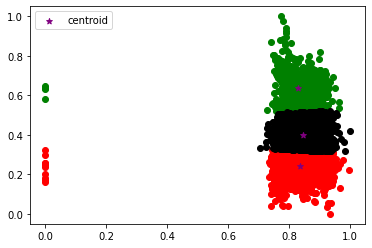

In [74]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]



plt.scatter(df1.AvgTemperature,df1['Mean'],color='green')
plt.scatter(df2.AvgTemperature,df2['Mean'],color='red')
plt.scatter(df3.AvgTemperature,df3['Mean'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()